--- Fetching historical data for portfolio optimization ---


[*********************100%***********************]  3 of 3 completed



--- Running Monte Carlo Simulation (10,000 portfolios) ---

--- Optimal Portfolio Summary ---

Max Sharpe Ratio Portfolio:
Return          0.233535
Volatility      0.257362
Sharpe Ratio    0.839421
TSLA            0.005041
BND             0.712156
SPY             0.282803
Name: 6180, dtype: float64

Minimum Volatility Portfolio:
Return          0.027381
Volatility      0.054122
Sharpe Ratio    0.182574
TSLA            0.946704
BND             0.049792
SPY             0.003504
Name: 1787, dtype: float64

--- Generating Efficient Frontier plot ---


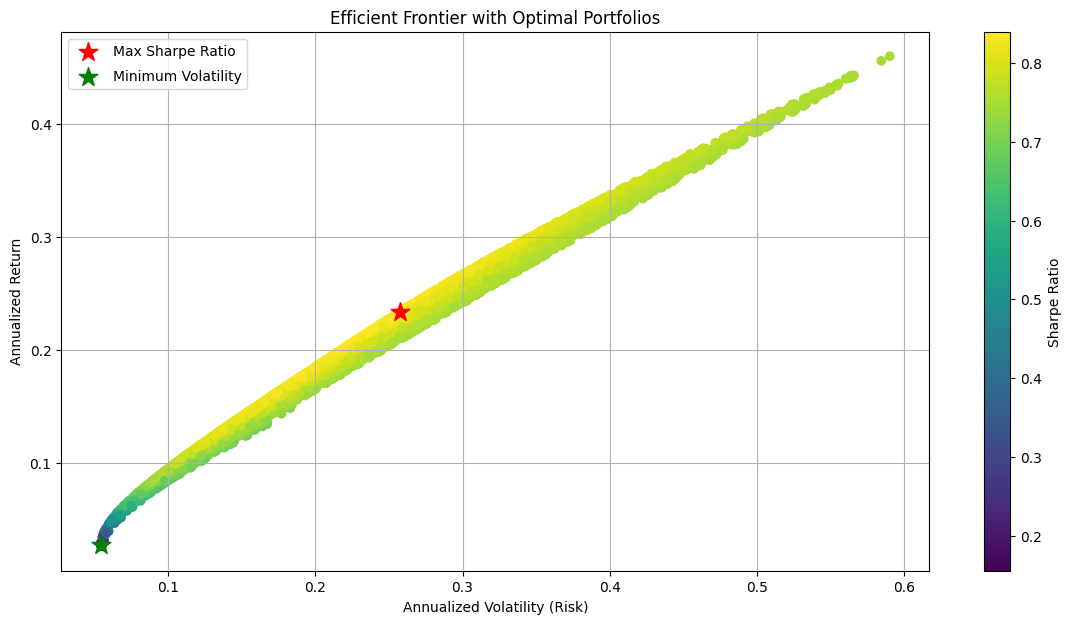

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-07-01"
end_date = "2025-07-31"

print("--- Fetching historical data for portfolio optimization ---")
portfolio_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
portfolio_data.ffill(inplace=True)
portfolio_data.dropna(inplace=True)

returns = portfolio_data.pct_change().dropna()
annual_days = 252

print("\n--- Running Monte Carlo Simulation (10,000 portfolios) ---")
num_portfolios = 10000
results = np.zeros((len(tickers) + 3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(returns.mean() * weights) * annual_days
    
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * annual_days, weights)))
    
    risk_free_rate = 0.0175
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio
    results[3:,i] = weights

columns = ['Return', 'Volatility', 'Sharpe Ratio'] + tickers
results_frame = pd.DataFrame(results.T, columns=columns)

max_sharpe_portfolio = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]
min_volatility_portfolio = results_frame.iloc[results_frame['Volatility'].idxmin()]

print("\n--- Optimal Portfolio Summary ---")
print("\nMax Sharpe Ratio Portfolio:")
print(max_sharpe_portfolio)
print("\nMinimum Volatility Portfolio:")
print(min_volatility_portfolio)

print("\n--- Generating Efficient Frontier plot ---")
plt.figure(figsize=(14, 7))
plt.scatter(results_frame['Volatility'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], marker='*', color='red', s=200, label='Max Sharpe Ratio')
plt.scatter(min_volatility_portfolio['Volatility'], min_volatility_portfolio['Return'], marker='*', color='green', s=200, label='Minimum Volatility')

plt.title('Efficient Frontier with Optimal Portfolios')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.legend(labelspacing=0.8)
plt.grid(True)
plt.show()
